<a href="https://colab.research.google.com/github/shamsurlm10/heart_attack_possibilty/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing

In [141]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as splt
import seaborn

Data Collection and Processing

In [142]:
heart_data = pd.read_csv('/content/cardio_train.csv',sep=';')

In [143]:
heart_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [144]:
#the number of row and columns
heart_data.shape

(70000, 13)

In [145]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [146]:
heart_data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


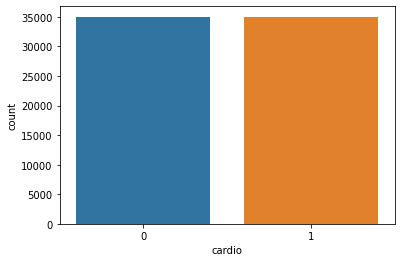

In [147]:
seaborn.countplot(heart_data['cardio'])

In [148]:
heart_data.isnull().values.any()

False

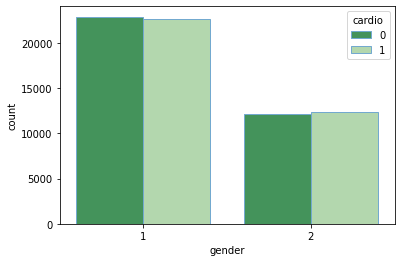

In [149]:
seaborn.countplot(x='gender',hue='cardio',data=heart_data,palette='Greens_r',edgecolor=seaborn.color_palette('PuBu',n_colors=1))

In [150]:
heart_data['gender'].nunique()

2

In [151]:
heart_data['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [152]:
heart_data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [153]:
x = heart_data.iloc[:,:-1]
x

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,18393,2,168,62.0,110,80,1,1,0,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0


In [154]:
y = heart_data.iloc[:,12]
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [155]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.3, random_state=1)
xtrain

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
23561,33670,16136,2,169,71.0,100,80,1,1,1,0,1
34858,49789,14615,1,158,69.0,140,80,2,1,0,0,1
54953,78398,20507,1,164,65.0,120,80,1,1,0,0,1
59230,84572,16720,1,153,53.0,100,60,1,1,0,0,1
1730,2449,21050,1,159,71.0,140,90,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49100,70099,21289,2,175,78.0,120,80,1,1,0,0,1
20609,29410,19116,1,164,68.0,120,80,1,1,0,0,0
21440,30634,18049,2,178,82.0,120,80,1,1,0,0,1
50057,71447,21957,1,169,77.0,120,80,1,1,0,0,0


In [156]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier()
ran_for.fit(xtrain,ytrain)

RandomForestClassifier()

In [157]:
ran_for.score(xtest,ytest)

0.7249523809523809